In [5]:
from bs4 import BeautifulSoup
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import requests
import json

In [7]:
url = "https://www.treasury.gov/resource-center/data-chart-center/interest-rates/Pages/TextView.aspx?data=yield"
def treasury_data(url):
    response = requests.get(url)
    soup = BeautifulSoup(response.text)
    table = soup.find("table", attrs= {"class":"t-chart"})
    rows = table.find_all('tr')
    th_td_list = []
    
    for row in rows[1:]:
        tds = row.findAll('td')
        th_td_data_row = []
        for td in tds:
            td_text = td.text.strip()
            if '.' in td_text:
                count_digits = len(td_text) - td_text.index('.')- 1
                td_text = int(''.join(td_text.split('.'))) / 10 ** count_digits
            th_td_data_row.append(td_text)
        th_td_list.append(th_td_data_row)
    return th_td_list

data = treasury_data(url)

In [8]:
df = pd.DataFrame(data, columns= ["Date", "1Mo", "2Mo", "3Mo", "6Mo", "1Yr","2Yr", 
                                  "3Yr","5Yr","7Yr", "10Yr", "20Yr", "30Yr"])

In [9]:
df

,Date,1Mo,2Mo,3Mo,6Mo,1Yr,2Yr,3Yr,5Yr,7Yr,10Yr,20Yr,30Yr
0,04/01/21,0.02,0.02,0.02,0.04,0.06,0.17,0.35,0.90,1.37,1.69,2.24,2.34
1,04/02/21,0.02,0.02,0.02,0.04,0.07,0.19,0.39,0.97,1.42,1.72,2.27,2.35
2,04/05/21,0.03,0.02,0.03,0.04,0.06,0.17,0.37,0.94,1.40,1.73,2.28,2.36
3,04/06/21,0.02,0.02,0.02,0.04,0.06,0.16,0.35,0.88,1.34,1.67,2.24,2.32
4,04/07/21,0.01,0.02,0.02,0.04,0.06,0.16,0.34,0.87,1.34,1.68,2.26,2.35
5,04/08/21,0.02,0.02,0.01,0.04,0.05,0.14,0.33,0.85,1.30,1.64,2.22,2.32
6,04/09/21,0.02,0.01,0.02,0.03,0.06,0.16,0.35,0.87,1.33,1.67,2.23,2.34
7,04/12/21,0.02,0.02,0.02,0.04,0.06,0.18,0.38,0.89,1.35,1.69,2.24,2.34
8,04/13/21,0.03,0.02,0.03,0.05,0.06,0.16,0.35,0.85,1.29,1.64,2.21,2.32
9,04/14/21,0.02,0.02,0.02,0.04,0.06,0.16,0.35,0.87,1.31,1.64,2.22,2.32


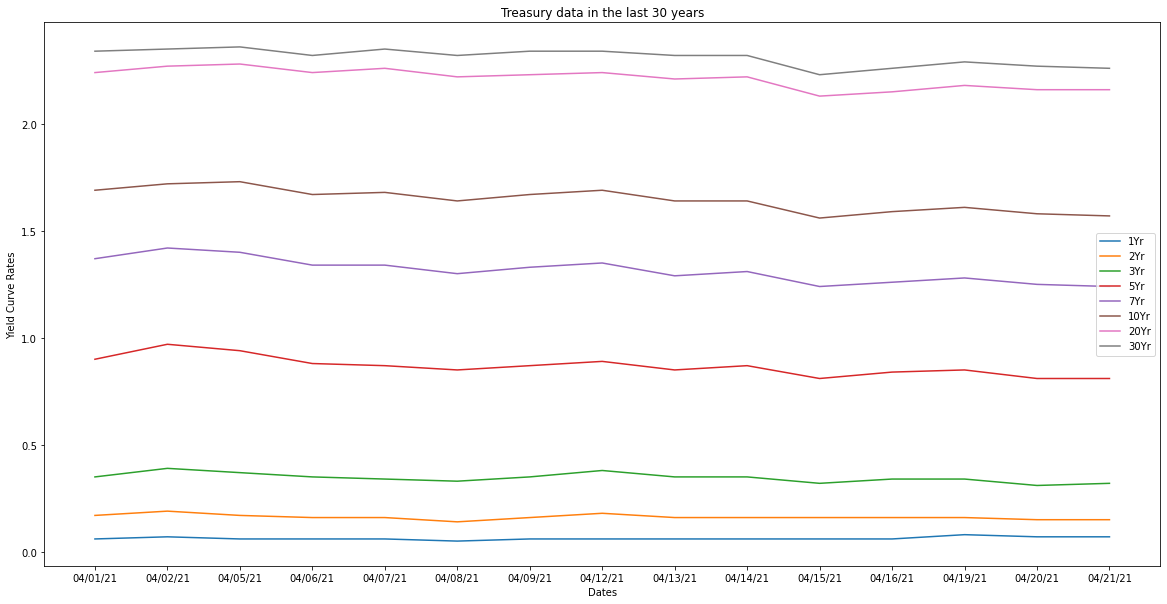

In [31]:
def chart():
    labels = ["1Yr","2Yr","3Yr","5Yr","7Yr", "10Yr", "20Yr", "30Yr"]
    fig,ax = plt.subplots(figsize= (20,10))
    ax.plot(df.groupby("Date")[["1Yr","2Yr","3Yr","5Yr","7Yr", "10Yr", "20Yr", "30Yr"]].sum())
    ax.set(title= "Treasury data in the last 30 years",ylabel ="Yield Curve Rates", xlabel ="Dates")
    ax.legend(labels)
    plt.savefig('../charts/Dailyycr.png')
chart = chart()